In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from pychangcooper import ChangCooper


# Specifying a problem

## Defining heating and dispersion terms.
The ChangCooper class automatically specifies the appropriate difference scheme for any time-independent heating and acceleration terms.  

In [2]:
class MySolver(ChangCooper):
    
    def __init__(self):
        
        # we have no injection, so we must have an
        # initial non-zero distribution function
        
        init_distribution = np.ones(100)
        
        
        # must pass up to the super class so that
        # all terms are setup after initialization
        
        super(MySolver, self).__init__(n_grid_points=100,
                                       delta_t= 1.,
                                       max_grid=1E5,
                                       initial_distribution=init_distribution,
                                       store_progress=True # store each time step
                                      )
        
    def _define_terms(self):
        
        # energy dependent heating and dispersion terms
        # must be evaluated at half grid points.
        
        # These half grid points are automatically
        # calculated about object creation.
        
        
        
        self._heating_term = self._half_grid
        
        self._dispersion_term = self._half_grid2
    
    
    
    

To run the solver, simply call the solution method. If the store_progress option has been set, then each solution is stored in the objects history.

In [3]:
solver = MySolver()

# amount of time that has gone by
print(solver.current_time)

# number of 
print(solver.n_iterations)

# current solution
print(solver.n)

0.0
0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [4]:
solver.solve_time_step()


# amount of time that has gone by
print(solver.current_time)

# number of 
print(solver.n_iterations)

# current solution
print(solver.n)

1.0
1
[10.28587875  9.38231525  8.65268405  8.06122973  7.57954714  7.18507042
  6.85987258  6.58971189  6.36327433  6.17157169  6.00746348  5.86527709
  5.74050603  5.62957022  5.52962553  5.43841252  5.35413619  5.27537057
  5.20098283  5.13007298  5.06192609  4.99597417  4.93176599  4.8689431
  4.80722071  4.7463726   4.68621905  4.62661726  4.56745381  4.5086386
  4.45010004  4.39178125  4.33363706  4.27563157  4.21773627  4.15992851
  4.1021903   4.04450733  3.98686825  3.92926404  3.87168753  3.81413302
  3.756596    3.69907286  3.64156076  3.58405742  3.52656104  3.4690702
  3.41158375  3.3541008   3.29662061  3.23914263  3.1816664   3.12419156
  3.06671783  3.00924497  2.95177281  2.89430121  2.83683004  2.77935922
  2.72188869  2.66441837  2.60694822  2.54947822  2.49200833  2.43453852
  2.37706879  2.31959911  2.26212947  2.20465987  2.1471903   2.08972075
  2.03225121  1.9747817   1.91731219  1.85984269  1.8023732   1.74490371
  1.68743423  1.62996475  1.57249527  1.5150258 

We can plot the evolution of the solution if we have been storing it.

<IPython.core.display.Javascript object>


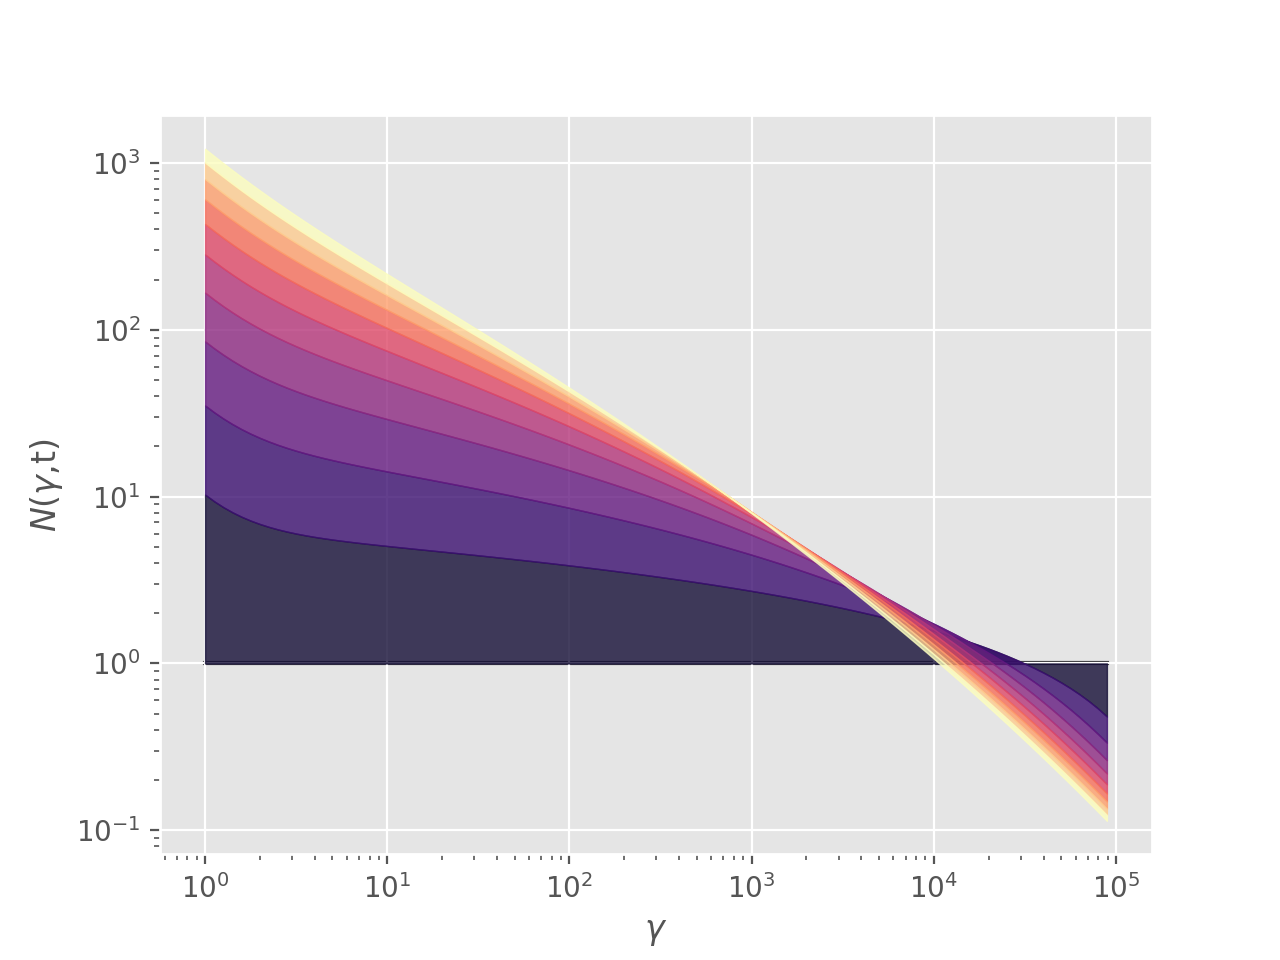

In [5]:
for i in range(10):
    
    solver.solve_time_step()

solver.plot_evolution(alpha=.8);

## Adding source and escape terms

The general Chang and Cooper scheme does not specify injection and esacpe. But we can easily add them on. In this case, the Fokker-Planck equation reads:

$$\frac{\partial N\left(\gamma, t\right)}{\partial t}  = \frac{\partial }{\partial \gamma} \left[ B \left(\gamma, t \right)N\left(\gamma, t\right) + C \left(\gamma, t \right) \frac{\partial N\left(\gamma, t\right)}{\partial \gamma}\right] - E\left(\gamma, t \right) + Q\left(\gamma, t \right) \text{.}$$

In order ot include these terms, we simply need to define a source and escape function which will be evaluated on the grid at each iteration of the solution.


In [6]:
class MySolver(ChangCooper):
    
    def __init__(self):
        
        # must pass up to the super class so that
        # all terms are setup after initialization
        
        super(MySolver, self).__init__(n_grid_points=100,
                                       delta_t= 1., # the time step of the solution
                                       max_grid=1E5,
                                       initial_distribution=None,
                                       store_progress=True
                                      )
        
    def _define_terms(self):
        
        # energy dependent heating and dispersion terms
        # must be evaluated at half grid points.
        
        # These half grid points are automatically
        # calculated about object creation.
        
        
        
        self._heating_term = self._half_grid
        
        self._dispersion_term = self._half_grid2
    
    
    def _source_function(self, gamma):
        
        # power law injection 
        return gamma**2
    
    def _escape_function(self, gamma):
        
        # constant, energy-independent escape term
        return 0.5 * np.ones_like(gamma)
        
        

Upon object creation, the source and escape terms are automatically evaluated.

<IPython.core.display.Javascript object>


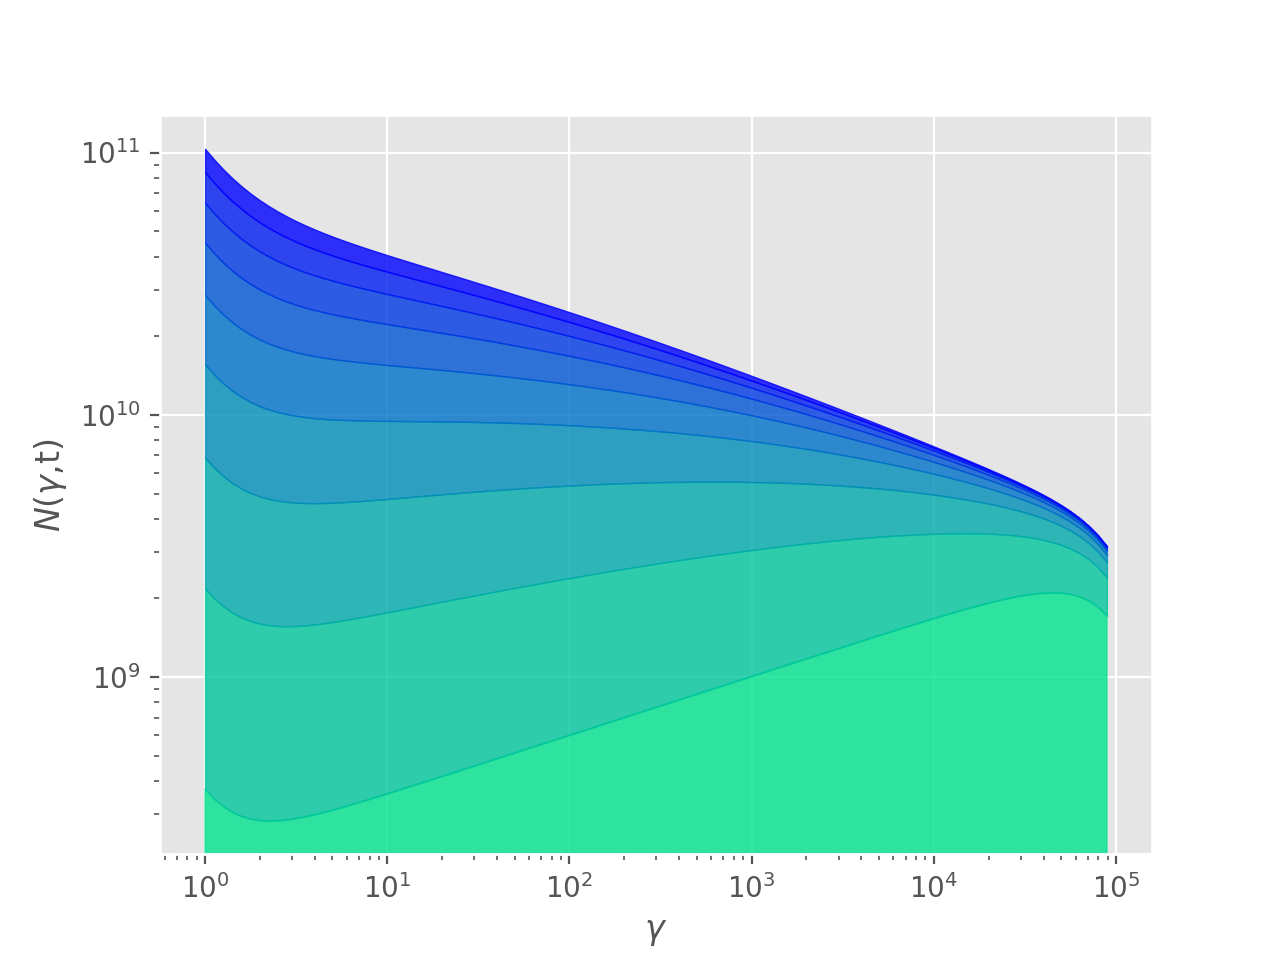

In [7]:
solver = MySolver()

for i in range(10):
    
    solver.solve_time_step()

solver.plot_evolution(alpha=.8, cmap='winter');